In [1]:
import numpy as np

class Embed:
    def __init__(self, vocab):
        self.vocab = vocab
        self.n = len(vocab)
        self.char2id = {c: i for i, c in enumerate(vocab)}
        self.id2char = {i: c for i, c in enumerate(vocab)}

    def one_hot(self, char_seq):
        emb_mat = np.zeros((len(char_seq), self.n))
        for i, char in enumerate(char_seq):
            emb_mat[i] = self._one_hot(char)
        return emb_mat

    def _one_hot(self, char):
        vec = np.zeros(self.n)
        if char in self.vocab:
            vec[self.char2id[char]] = 2
        return vec.tolist()


chars = list('aeiou')
emb = Embed(chars)

In [2]:
%reload_ext autoreload
%autoreload 2


import pandas as pd
from src.nuclei.anneal import Anneal
from src.nuclei.nucleus import Nucleus

In [21]:
stimuli = {
    'x': emb.one_hot(chars),
    'y': [0, 0, 2]
}

stimuli['x']

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [22]:
input_size = len(stimuli['x'])
n = Nucleus(input_size)
temp = input_size
anneal = Anneal(n, temp, steps=100, epochs=5)

<Axes: >

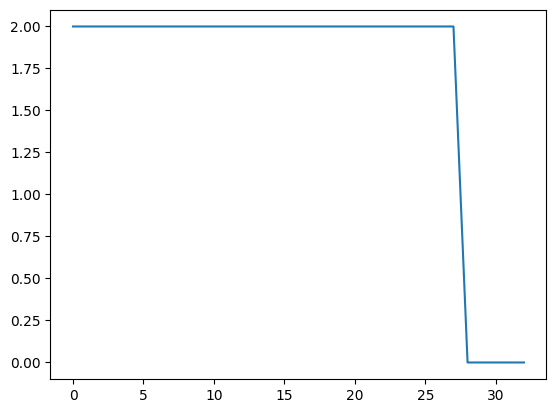

In [23]:
best, loss = anneal.stimulate(stimuli)
pd.Series(loss).plot()

In [24]:
best

[[1.         1.         1.         1.         1.         1.00000258]
 [1.         0.         1.         1.         1.         1.        ]
 [1.         1.00000516 1.         1.         1.         1.        ]
 [1.         1.         1.         0.         1.         1.        ]
 [1.         1.         0.99999955 1.         1.         1.        ]
 [0.99999955 1.         1.         0.99999955 1.         2.        ]]

In [25]:
best.project(emb.one_hot('a')[0]), best.project(emb.one_hot('e')[0]), best.project(emb.one_hot('i')[0])

(0, 0, 2)